# Linear Regression Tutorial: Checking Assumptions
## Step 1: Import the Libraries
To start, we’ll import the Python libraries we need. We also need to import the data. Remember, we only want to use the regression model after we got to know our data well. EDA is always the first step.
- NumPy and Pandas: Help us handle and organize data.
- Matplotlib and Seaborn: Make charts for data visualization.
- Statsmodels: Checks assumptions, like multicollinearity.
- Scikit-Learn: Has tools for building linear regression models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/nidhipatil/Documents/research_project/profs.csv')
df.sample(5)
df['responserate'] = df['students']/df['allstudents']

## Step 2: Select Predictors and Load and Split the Data
Think about the relationship you’re trying to study. What variables logically and theoretically impact your target variable (dependent variable)? For example, if predicting salary, factors like age, experience, and education might be relevant. Choose predictors that make sense for your research question.
#### Check Statistical Significance and Adjusted R-squared:
After fitting your model, look at p-values for each predictor. Predictors with high p-values (typically >0.05) might not be contributing significantly to explaining the target variable. However, always consider the context—if a predictor is theoretically important, you may still include it, even if it's not statistically significant. Adjusted R-squared also helps by indicating the overall explanatory power of the model, considering the number of predictors.
#### Simpler is Often Better:
Keep the model as simple as possible without sacrificing predictive accuracy. Adding too many predictors can make the model complex, hard to interpret, and vulnerable to overfitting (performing well on the training data but poorly on new data). Only include variables that meaningfully improve the model’s fit and insights.
#### Train-Test Split
We also may want to know how good is our model, so we use a tool to split into test and train data.

![ Alt Text](/Users/clarissaache/Documents/Polygence/1_train-test-split_0.jpg)

In [3]:
# X is your data with independent variables; y is the target variable.
df_encoded = pd.get_dummies(df, columns=['gender','tenure','native','division','credits','minority'], drop_first=True)
df_encoded

,age,beauty,eval,students,allstudents,prof,responserate,gender_male,tenure_yes,native_yes,division_upper,credits_single,minority_yes
0,36,0.289916,4.3,24,43,1,0.558140,False,True,True,True,False,True
1,59,-0.737732,4.5,17,20,2,0.850000,True,True,True,True,False,False
2,51,-0.571984,3.7,55,55,3,1.000000,True,True,True,True,False,False
3,40,-0.677963,4.3,40,46,4,0.869565,False,True,True,True,False,False
4,31,1.509794,4.4,42,48,5,0.875000,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,32,1.231394,3.2,9,21,93,0.428571,True,True,True,False,False,False
459,32,1.231394,4.3,52,86,93,0.604651,True,True,True,True,False,False
460,42,0.420400,3.3,52,67,94,0.776119,False,True,False,True,False,True
461,42,0.420400,3.2,54,66,94,0.818182,False,True,False,True,False,True


In [4]:
y = df_encoded[['eval']]
X = df_encoded[['beauty','age','minority_yes','gender_male','division_upper','native_yes','tenure_yes','credits_single','responserate']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# However, we are not going to predict anything

## Step 3: Build and Fit the Model
Now, let’s fit a simple linear regression model.

In [5]:
# Create a linear regression model and fit it to the training data
model = LinearRegression().fit(X, y)

# Predict on the test data and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

model

LinearRegression()

## Step 4: Check the Assumptions
### 1. Linearity: Plot Residuals vs. Predicted Values
In a good linear model, residuals (errors) should look random.

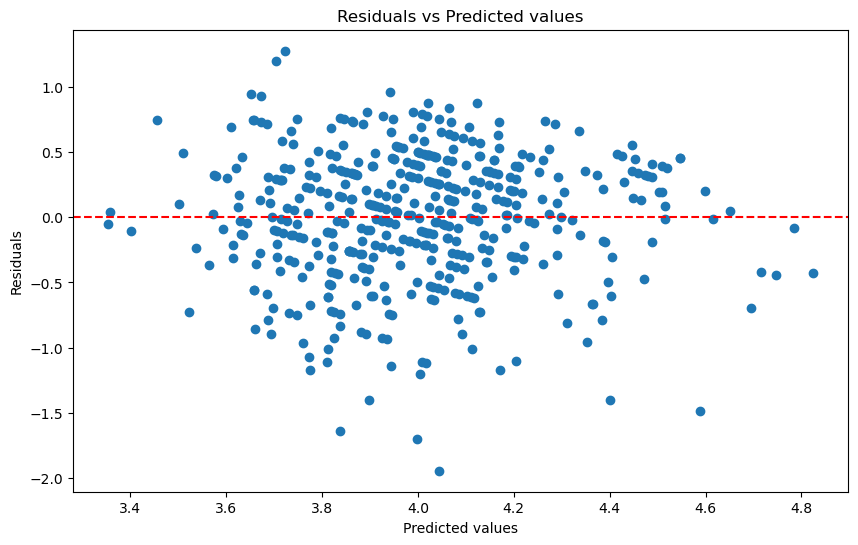

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
plt.show()

***Interpretation***: If the residuals are scattered randomly, the linearity assumption is likely met.

### 2. Normality: Check Residuals Histogram and Q-Q Plot
The histogram and Q-Q plot show if errors are normally distributed.

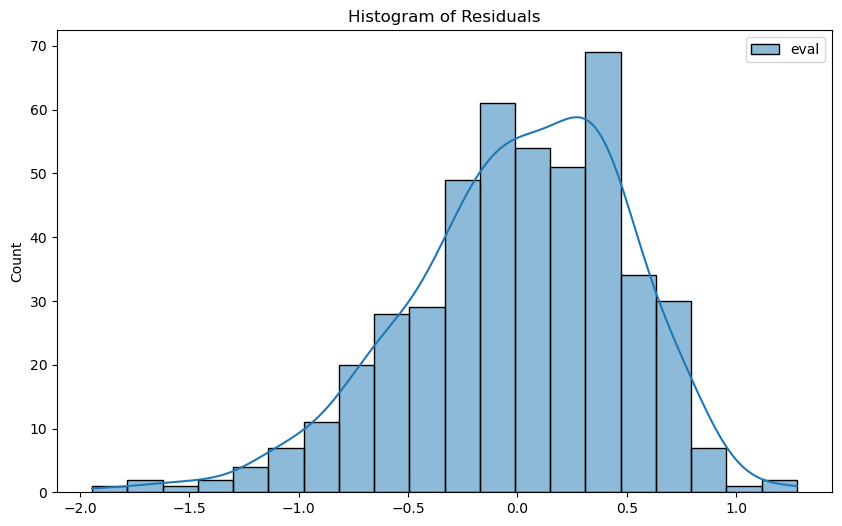

In [7]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()


***Interpretation***: In the histogram, residuals should look like a bell curve. In the Q-Q plot, points should line up straight.

### 3. Homoscedasticity: Consistent Spread of Residuals
Residuals should have a similar spread across all values.

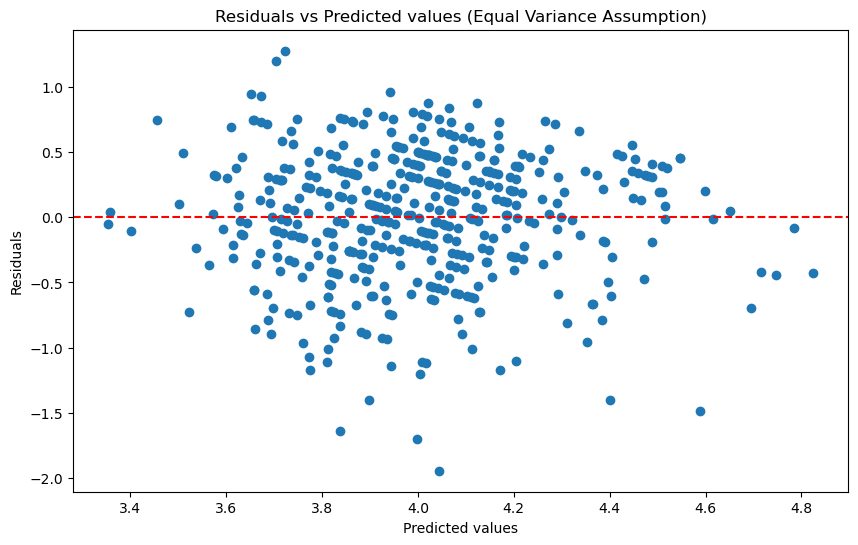

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values (Equal Variance Assumption)")
plt.show()


***Interpretation***: If the spread of residuals looks the same throughout, we have homoscedasticity (constant spread).

### 4. Independence: Durbin-Watson Test
We want to know if residuals are independent, meaning they aren’t related to each other.

In [9]:
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: [1.57482753]


***Interpretation***: A value close to 2 suggests independence, which is good!

### 5. Multicollinearity: Variance Inflation Factor (VIF)
This checks if predictors are too similar. If VIF is above 10, we might have a problem.

In [10]:
X_with_const = sm.add_constant(X[['age','beauty','responserate']])  # add constant to predictor variables
vif = pd.DataFrame()
vif["Variable"] = X[['age','beauty','responserate']].columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(len(X[['age','beauty','responserate']].columns))]
print(vif)

       Variable       VIF
0           age  1.102626
1        beauty  1.113018
2  responserate  1.026275


***Interpretation***: Low VIF values (below 10) are ideal, meaning predictors are not too similar.

# Model Interpretation


To create a linear regression model using ols, specify the formula in the format "target_variable ~ predictor_variables"
## Step 1: Center Variables
We’ll first calculate the mean of the age variable, then subtract this mean from each age value in our dataset.
### Why Center the Data?
Centering makes the intercept more interpretable because it now represents the predicted salary for the average age, rather than for age = 0 (which might not even be meaningful in many datasets). This can also help with model stability, especially when dealing with higher-order polynomial terms.

In [11]:
df.describe()

,age,beauty,eval,students,allstudents,prof,responserate
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.263499e-08,3.998272,36.624190,55.177106,45.434125,0.744278
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.167563
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.104167
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.626962
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.769231
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.872492
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000


In [12]:
# Calculate the mean of 'age'
age_mean = df['age'].mean()
beauty_mean = df['beauty'].mean()
responserate_mean = df['responserate'].mean()

# Center the 'age' variable
df['age_centered'] = df['age'] - age_mean
df['beauty_centered'] = df['beauty'] - beauty_mean
df['responserate_centered'] = df['responserate'] - responserate_mean

## Step 2: Run the Linear Regression Model with the Centered Data

In [13]:
import statsmodels.formula.api as smf

m = smf.ols("eval ~ C(gender) + age_centered + beauty_centered + responserate_centered + C(tenure) + C(native) + C(division) + C(credits) + C(minority)", df).fit()
m.get_robustcov_results(cov_type="HC3").summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     13.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.22e-19
Time:                        19:10:30   Log-Likelihood:                -333.64
No. Observations:                 463   AIC:                             687.3
Df Residuals:                     453   BIC:                             728.7
Df Model:                           9                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.7260      0.122     30.565      0.000       3.486       3.966
C(gender)[T.male]         0.1992      0.052      3.836      0.000       0.097       0.301
C(tenure)[T.yes]         -0.0498      0.057     -0.867      0.386      -0.163       0.063
C(native)[T.yes]          0.2257      0.097      2.338      0.020       0.036       0.415
C(division)[T.upper]     -0.0307      0.055     -0.562      0.575      -0.138       0.077
C(credits)[T.single]      0.5418      0.117      4.617      0.000       0.311       0.772
C(minority)[T.yes]       -0.1990      0.070     -2.829      0.005      -0.337      -0.061
age_centered             -0.0017      0.003     -0.665      0.506      -0.007       0.003
beauty_centered           0.1381      0.030      4.612      0.000       0.079       0.197
responserate_centered     0.6592      0.141      4.691      0.000       0.383       0.935
==============================================================================
Omnibus:                       29.094   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.094
Skew:                          -0.605   Prob(JB):                     6.51e-08
Kurtosis:                       3.499   Cond. No.                         70.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [14]:
import statsmodels.formula.api as smf

m = smf.ols("eval ~ C(gender) + age_centered + beauty_centered + responserate_centered + C(tenure) + C(native) + C(division) + C(credits) + C(minority)", df).fit()
m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     13.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.22e-19
Time:                        19:10:31   Log-Likelihood:                -333.64
No. Observations:                 463   AIC:                             687.3
Df Residuals:                     453   BIC:                             728.7
Df Model:                           9                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.7260      0.122     30.565      0.000       3.486       3.966
C(gender)[T.male]         0.1992      0.052      3.836      0.000       0.097       0.301
C(tenure)[T.yes]         -0.0498      0.057     -0.867      0.386      -0.163       0.063
C(native)[T.yes]          0.2257      0.097      2.338      0.020       0.036       0.415
C(division)[T.upper]     -0.0307      0.055     -0.562      0.575      -0.138       0.077
C(credits)[T.single]      0.5418      0.117      4.617      0.000       0.311       0.772
C(minority)[T.yes]       -0.1990      0.070     -2.829      0.005      -0.337      -0.061
age_centered             -0.0017      0.003     -0.665      0.506      -0.007       0.003
beauty_centered           0.1381      0.030      4.612      0.000       0.079       0.197
responserate_centered     0.6592      0.141      4.691      0.000       0.383       0.935
==============================================================================
Omnibus:                       29.094   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.094
Skew:                          -0.605   Prob(JB):                     6.51e-08
Kurtosis:                       3.499   Cond. No.                         70.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [15]:
m = smf.ols("eval ~ C(gender) + age", df).fit()
m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     7.877
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000433
Time:                        19:10:31   Log-Likelihood:                -376.20
No. Observations:                 463   AIC:                             758.4
Df Residuals:                     460   BIC:                             770.8
Df Model:                           2                                         
Covariance Type:                  HC3                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1632      0.132     31.584      0.000       3.904       4.422
C(gender)[T.male]     0.2009      0.053      3.798      0.000       0.097       0.305
age                  -0.0058      0.003     -2.071      0.039      -0.011      -0.000
==============================================================================
Omnibus:                       16.378   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.553
Skew:                          -0.476   Prob(JB):                     0.000154
Kurtosis:                       2.940   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [16]:
df["age2"] = df["age"]*df["age"]
m = smf.ols("eval ~ C(gender) + age + age2", df).fit()
m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.166
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000409
Time:                        19:10:31   Log-Likelihood:                -375.10
No. Observations:                 463   AIC:                             758.2
Df Residuals:                     459   BIC:                             774.8
Df Model:                           3                                         
Covariance Type:                  HC3                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3539      0.583      5.757      0.000       2.209       4.499
C(gender)[T.male]     0.2084      0.053      3.967      0.000       0.105       0.312
age                   0.0288      0.025      1.168      0.244      -0.020       0.077
age2                 -0.0004      0.000     -1.399      0.162      -0.001       0.000
==============================================================================
Omnibus:                       15.687   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.764
Skew:                          -0.464   Prob(JB):                     0.000229
Kurtosis:                       2.922   Cond. No.                     5.81e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

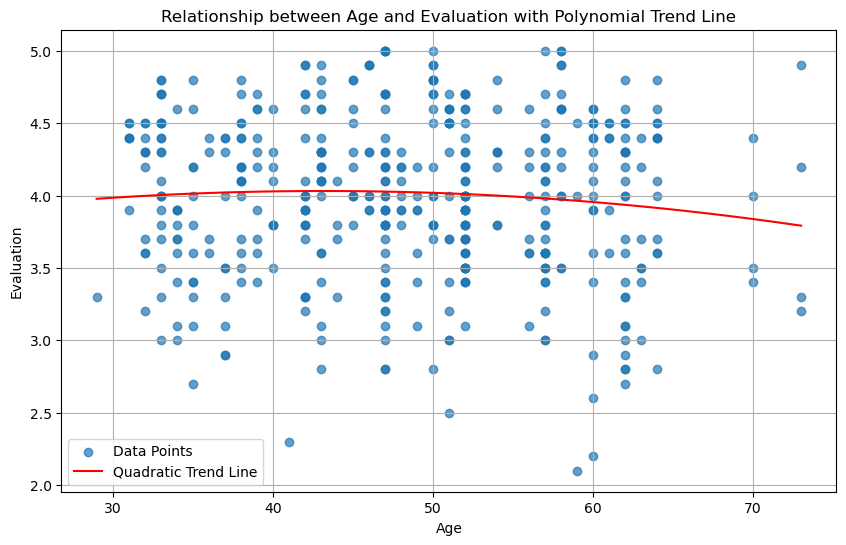

In [17]:
# Plotting the relationship between 'age' and 'eval'  
plt.figure(figsize=(10, 6))  
plt.scatter(df['age'], df['eval'], alpha=0.7, label='Data Points')  
  
# Calculate and plot a polynomial (quadratic) trend line  
p = np.poly1d(np.polyfit(df['age'], df['eval'], 2))  
ages = np.linspace(df['age'].min(), df['age'].max(), 100)  
plt.plot(ages, p(ages), color='red', label='Quadratic Trend Line')  
  
# Customize plot  
plt.title('Relationship between Age and Evaluation with Polynomial Trend Line')  
plt.xlabel('Age')  
plt.ylabel('Evaluation')  
plt.legend()  
plt.grid(True)  
plt.show()  

In [18]:
df["age2"] = df["age"]*df["age"]
m = smf.ols("eval ~ C(gender) * age", df).fit()

m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.945
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000140
Time:                        19:15:52   Log-Likelihood:                -374.28
No. Observations:                 463   AIC:                             756.6
Df Residuals:                     459   BIC:                             773.1
Df Model:                           3                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.4902      0.193     23.225      0.000       4.110       4.870
C(gender)[T.male]        -0.3210      0.265     -1.210      0.227      -0.842       0.200
age                      -0.0131      0.004     -3.098      0.002      -0.021      -0.005
C(gender)[T.male]:age     0.0111      0.006      1.999      0.046       0.000       0.022
==============================================================================
Omnibus:                       17.662   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.951
Skew:                          -0.495   Prob(JB):                     7.67e-05
Kurtosis:                       3.017   Cond. No.                         771.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

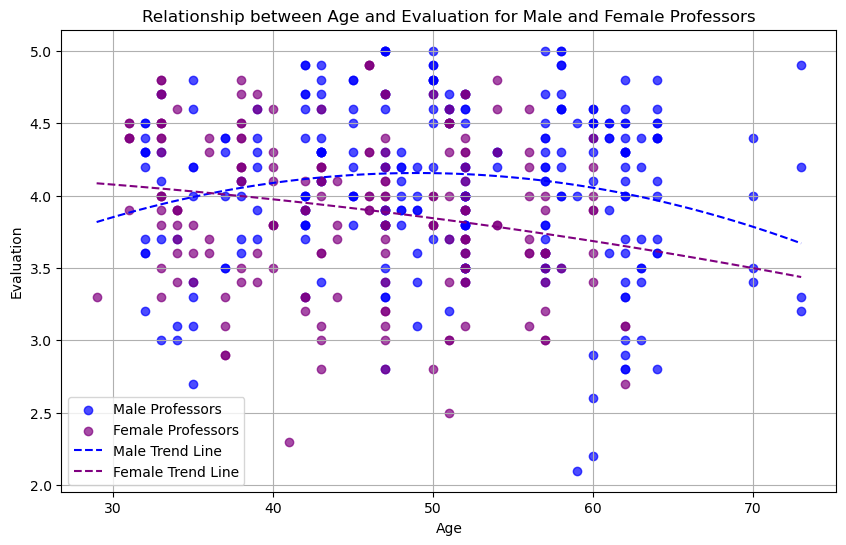

In [19]:
male_data = df[df['gender'] == 'male']  
female_data = df[df['gender'] == 'female']  
  
# Plotting the relationship between 'age' and 'eval' for both genders  
plt.figure(figsize=(10, 6))  
plt.scatter(male_data['age'], male_data['eval'], alpha=0.7, label='Male Professors', color='blue')  
plt.scatter(female_data['age'], female_data['eval'], alpha=0.7, label='Female Professors', color='purple')  
  
# Calculate and plot polynomial trend lines for each gender  
p_male = np.poly1d(np.polyfit(male_data['age'], male_data['eval'], 2))  
p_female = np.poly1d(np.polyfit(female_data['age'], female_data['eval'], 2))  
  
# Generate age range for smooth trend line plotting  
ages = np.linspace(df['age'].min(), df['age'].max(), 100)  
plt.plot(ages, p_male(ages), color='blue', linestyle='--', label='Male Trend Line')  
plt.plot(ages, p_female(ages), color='purple', linestyle='--', label='Female Trend Line')  
  
# Customize plot  
plt.title('Relationship between Age and Evaluation for Male and Female Professors')  
plt.xlabel('Age')  
plt.ylabel('Evaluation')  
plt.legend()  
plt.grid(True)  
plt.show()  

In [20]:
m = smf.ols("eval ~ C(native) * age", df).fit()

m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     9.516
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.15e-06
Time:                        19:36:13   Log-Likelihood:                -374.72
No. Observations:                 463   AIC:                             757.4
Df Residuals:                     459   BIC:                             774.0
Df Model:                           3                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4276      0.392      6.195      0.000       1.658       3.198
C(native)[T.yes]         1.8158      0.413      4.394      0.000       1.004       2.628
age                      0.0261      0.008      3.325      0.001       0.011       0.042
C(native)[T.yes]:age    -0.0308      0.008     -3.698      0.000      -0.047      -0.014
==============================================================================
Omnibus:                       15.806   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.828
Skew:                          -0.467   Prob(JB):                     0.000222
Kurtosis:                       2.983   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

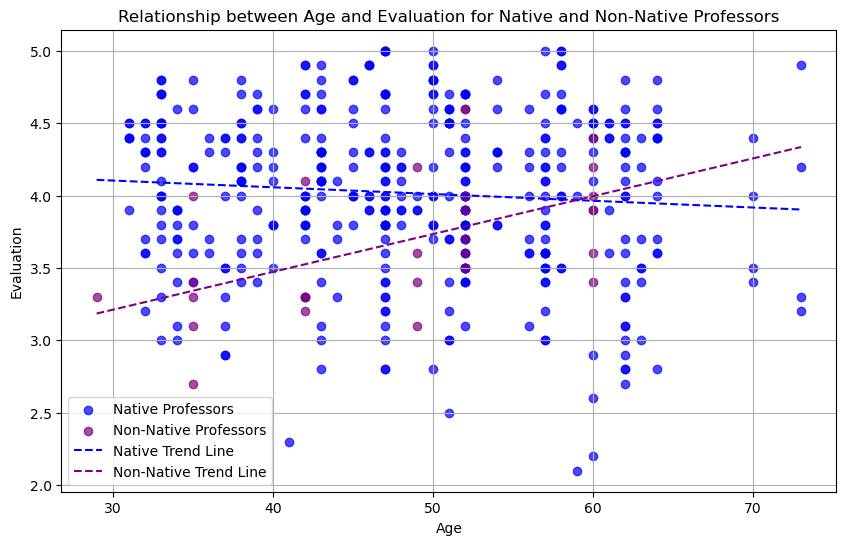

In [22]:
native_data = df[df['native'] == 'yes']  
nonnative_data = df[df['native'] == 'no']  
  
# Plotting the relationship between 'age' and 'eval' for both genders  
plt.figure(figsize=(10, 6))  
plt.scatter(native_data['age'], native_data['eval'], alpha=0.7, label='Native Professors', color='blue')  
plt.scatter(nonnative_data['age'], nonnative_data['eval'], alpha=0.7, label='Non-Native Professors', color='purple')  
  
# Calculate and plot polynomial trend lines for each gender  
p_native = np.poly1d(np.polyfit(native_data['age'], native_data['eval'], 1))  
p_nonnative = np.poly1d(np.polyfit(nonnative_data['age'], nonnative_data['eval'], 1))  
  
# Generate age range for smooth trend line plotting  
ages = np.linspace(df['age'].min(), df['age'].max(), 100)  
plt.plot(ages, p_native(ages), color='blue', linestyle='--', label='Native Trend Line')  
plt.plot(ages, p_nonnative(ages), color='purple', linestyle='--', label='Non-Native Trend Line')  
  
# Customize plot  
plt.title('Relationship between Age and Evaluation for Native and Non-Native Professors')  
plt.xlabel('Age')  
plt.ylabel('Evaluation')  
plt.legend()  
plt.grid(True)  
plt.show()  

In [23]:
m = smf.ols("eval ~ beauty * age", df).fit()

m.get_robustcov_results(cov_type="HC3").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     9.826
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.72e-06
Time:                        19:46:35   Log-Likelihood:                -370.06
No. Observations:                 463   AIC:                             748.1
Df Residuals:                     459   BIC:                             764.7
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9905      0.125     31.896      0.000       3.745       4.236
beauty        -0.3392      0.143     -2.373      0.018      -0.620      -0.058
age            0.0006      0.003      0.254      0.799      -0.004       0.006
beauty:age     0.0101      0.003      3.357      0.001       0.004       0.016
==============================================================================
Omnibus:                       12.683   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.028
Skew:                          -0.390   Prob(JB):                      0.00148
Kurtosis:                       2.739   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

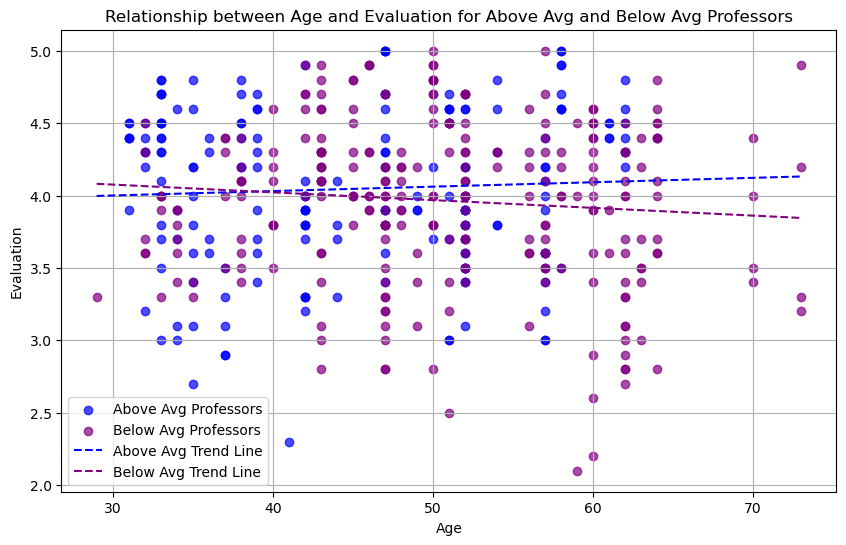

In [24]:
beauty_mean = df.beauty.mean()
above_average = df[df['beauty'] >= beauty_mean]  
below_average = df[df['beauty'] < beauty_mean]  
  
# Plotting the relationship between 'age' and 'eval' for both genders  
plt.figure(figsize=(10, 6))  
plt.scatter(above_average['age'], above_average['eval'], alpha=0.7, label='Above Avg Professors', color='blue')  
plt.scatter(below_average['age'], below_average['eval'], alpha=0.7, label='Below Avg Professors', color='purple')  
  
# Calculate and plot polynomial trend lines for each gender  
p_aboveavg = np.poly1d(np.polyfit(above_average['age'], above_average['eval'], 1))  
p_belowavg = np.poly1d(np.polyfit(below_average['age'], below_average['eval'], 1))  
  
# Generate age range for smooth trend line plotting  
ages = np.linspace(df['age'].min(), df['age'].max(), 100)  
plt.plot(ages, p_aboveavg(ages), color='blue', linestyle='--', label='Above Avg Trend Line')  
plt.plot(ages, p_belowavg(ages), color='purple', linestyle='--', label='Below Avg Trend Line')  
  
# Customize plot  
plt.title('Relationship between Age and Evaluation for Above Avg and Below Avg Professors')  
plt.xlabel('Age')  
plt.ylabel('Evaluation')  
plt.legend()  
plt.grid(True)  
plt.show() 